In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context("talk")
sns.set_style("ticks")
sns.set_palette("colorblind")

In [3]:
df_peng = sns.load_dataset("penguins")
df_peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


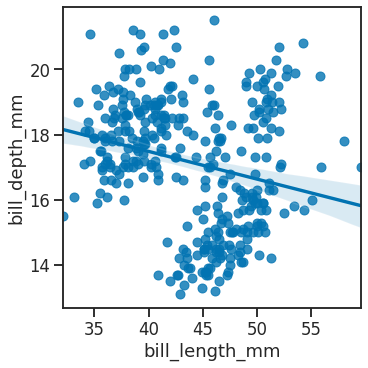

In [9]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, ax=ax)

fig.savefig("103_snsreglmplot_01.png")

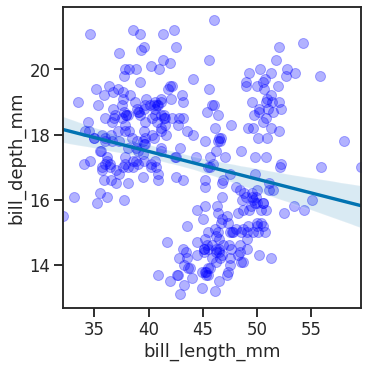

In [14]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, ax=ax,
            scatter_kws={"fc":"b", "ec":"b", "s":100, "alpha":0.3})

fig.savefig("103_snsreglmplot_02.png")

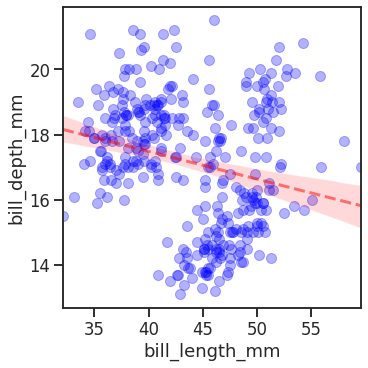

In [15]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, ax=ax,
            scatter_kws={"fc":"b", "ec":"b", "s":100, "alpha":0.3},
            color="r", line_kws={"lw":3, "ls":"--","alpha":0.5})

fig.savefig("103_snsreglmplot_03.png")

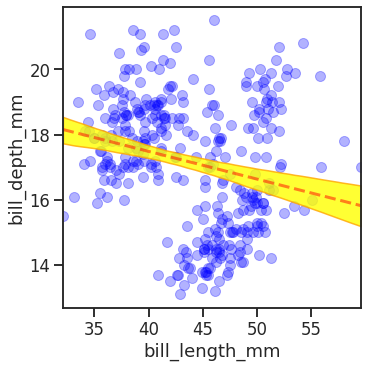

In [18]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, ax=ax,
            scatter_kws={"fc":"b", "ec":"b", "s":100, "alpha":0.3},
            color="r", line_kws={"lw":3, "ls":"--","alpha":0.5})

ci = ax.get_children()[2]                   # confidence band 추출
ci.set(fc="yellow", ec="orange", alpha=0.8) # face & edge color, alpha 조정

fig.savefig("103_snsreglmplot_04.png")

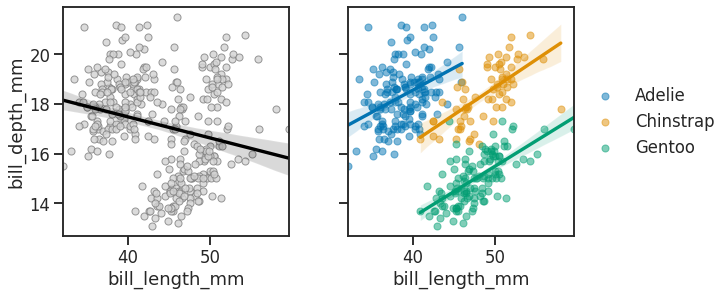

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4), constrained_layout=True, 
                        sharex=True, sharey=True)
   
# (A) 전체 시각화
sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, ax=axs[0], color="k",
            scatter_kws={"fc":"lightgray", "ec":"gray", "s":50})

# (B) species별 그룹 시각화
peng_species = df_peng["species"].unique()  # 펭귄 데이터셋 중 species 종류 추출
for species in peng_species:
    df_s = df_peng.loc[df_peng["species"] == species]   # species별 펭귄 데이터 추출
    sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=df_s, ax=axs[1], label=species,
                scatter_kws={"s":50, "alpha":0.5})
   
    axs[1].legend(loc="center left", bbox_to_anchor=[1, 0.5], frameon=False)
    axs[1].set_ylabel(" \n")                    # gridspec_kw를 사용하지 않고 Axes 간격 띄우기
    
fig.savefig("103_snsreglmplot_05.png")    

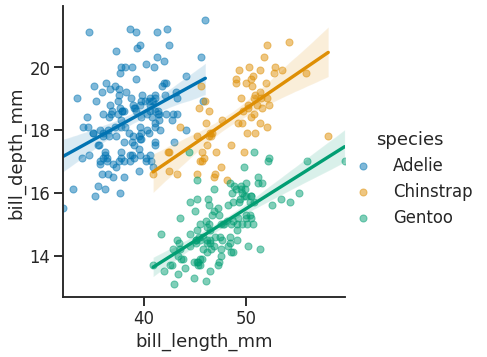

In [22]:
g = sns.lmplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, hue="species", 
               height=5, aspect=1,
               scatter_kws={"s":50, "alpha":0.5})

fig = g.fig
fig.savefig("103_snsreglmplot_06.png")    

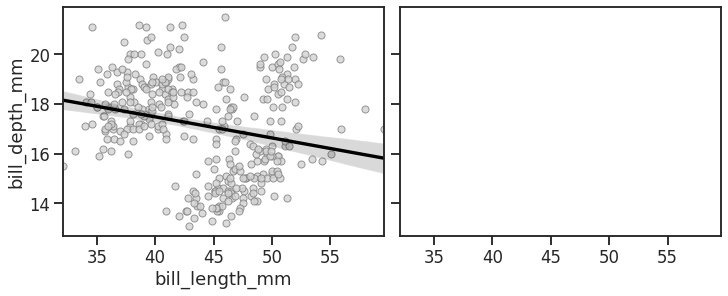

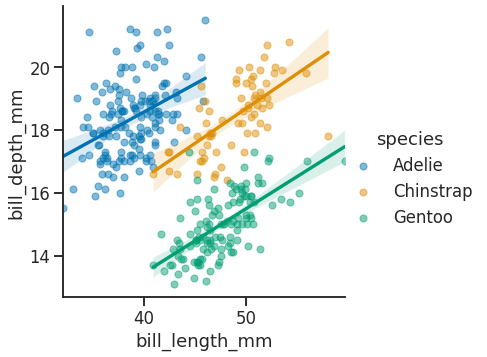

In [34]:
# Axes 두 개 생성
fig, axs = plt.subplots(ncols=2, figsize=(10, 4), constrained_layout=True, 
                        sharex=True, sharey=True)

# 전체 시각화
sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, ax=axs[0], color="k",
            scatter_kws={"fc":"lightgray", "ec":"gray", "s":50})

# sns.lmplot() 실행
sns.lmplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, hue="species",            
           scatter_kws={"s":50, "alpha":0.5})

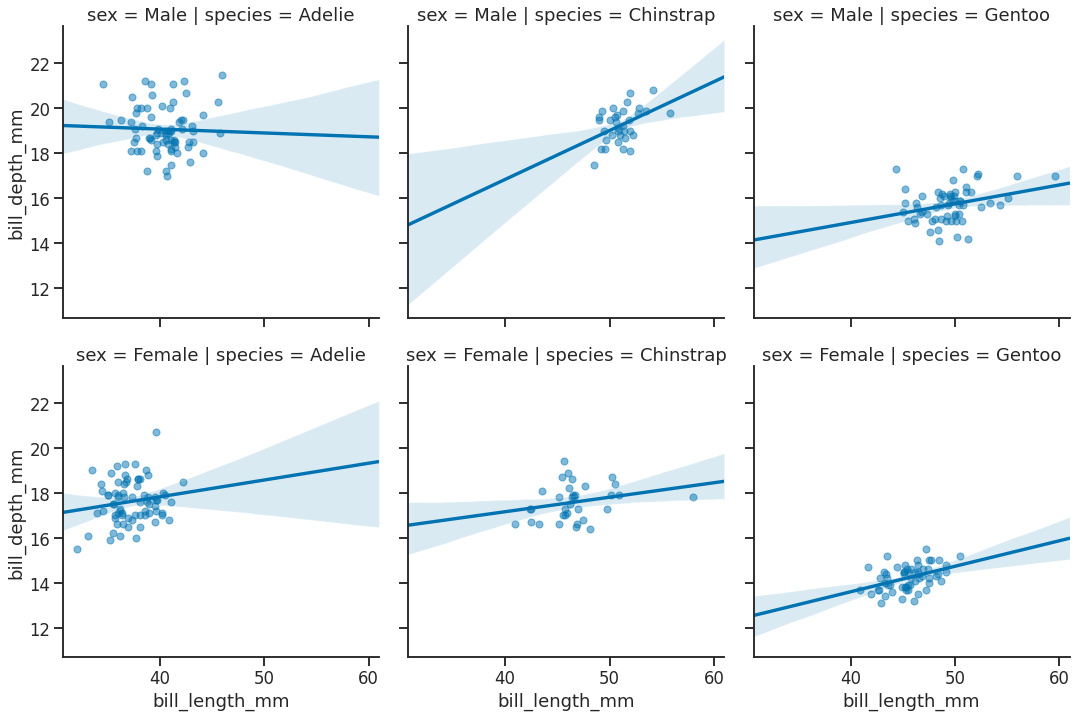

In [24]:
g = sns.lmplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, 
           col="species", row="sex",                          # species와 sex로 데이터 분할
           truncate=False, scatter_kws={"s":50, "alpha":0.5}) # sns.regplot() 사용 매개변수 적용

fig = g.fig
fig.savefig("103_snsreglmplot_08.png")    

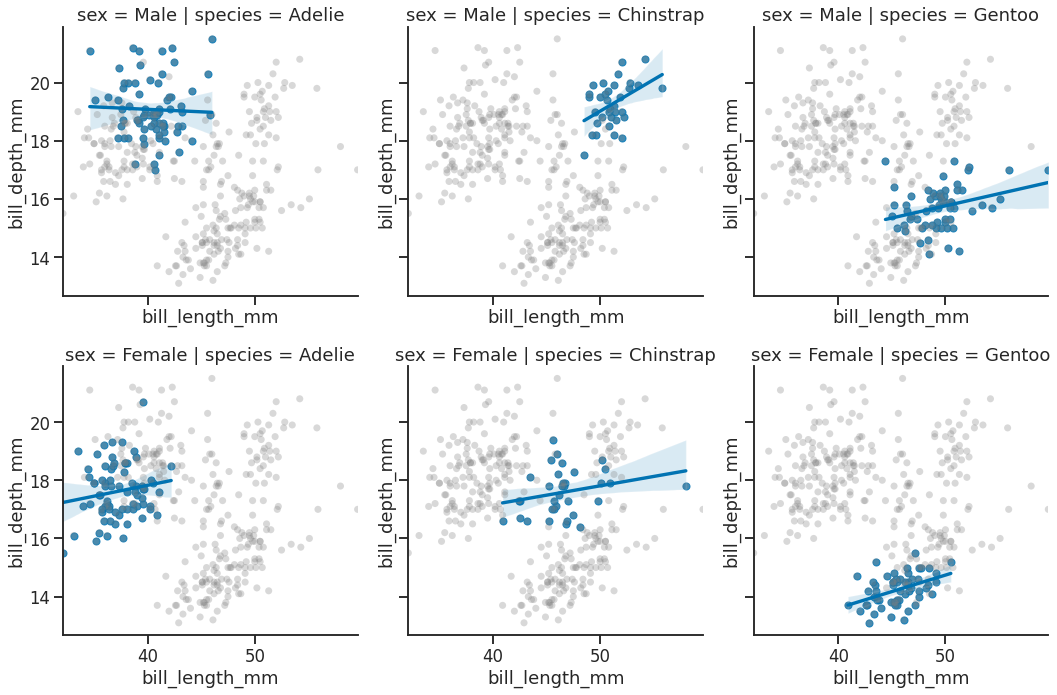

In [30]:
g = sns.lmplot(x="bill_length_mm", y="bill_depth_mm",       # sns.lmplot 생성 FacetGrid 출력
               data=df_peng, 
               col="species", row="sex",                    # species와 sex로 데이터 분할
               scatter_kws={"s":50})
  
axes = g.axes               # FacetGrid에서 Axes 추출
for ax in axes.ravel():     # Axes 순회, 전체 데이터를 배경으로 표현
    sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, 
                fit_reg=False, 
                scatter_kws={"fc":"gray", "ec":"none", "s":50, "alpha":0.3}, ax=ax)

fig = g.fig
fig.tight_layout()
fig.savefig("103_snsreglmplot_09.png")    

In [26]:
import matplotlib.colors as mcolors
import colorsys

def modify_hls(c, dh=0, dl=0, ds=0):
    if isinstance(c, str):
        c = mcolors.to_rgb(c)
    
    h, l, s = colorsys.rgb_to_hls(*c)
    h = h + dh
    l = max(min(l + dl, 1), 0)
    s = max(min(s + ds, 1), 0)
    return colorsys.hls_to_rgb(h, l, s)

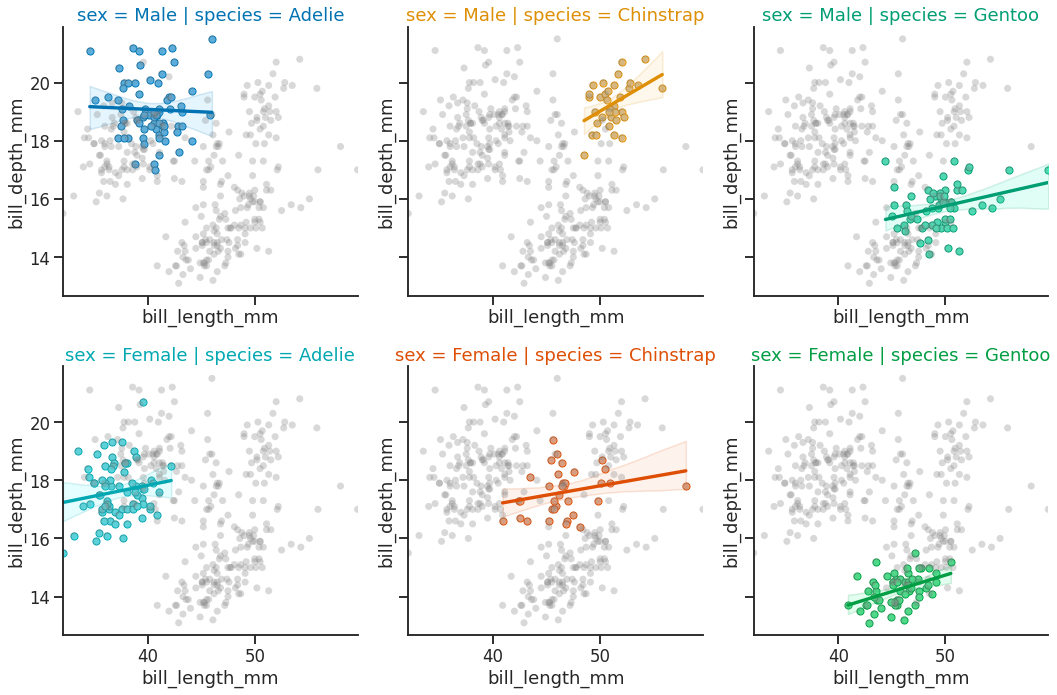

In [31]:
g = sns.lmplot(x="bill_length_mm", y="bill_depth_mm",       # sns.lmplot 생성 FacetGrid 출력
               data=df_peng, 
               col="species", row="sex",                    # species와 sex로 데이터 분할
               scatter_kws={"s":50})

axes = g.axes               # FacetGrid에서 Axes 추출
for i, ax in enumerate(axes.ravel()):     # Axes 순회, 전체 데이터를 배경으로 표현
    scatter, reg, cb = ax.get_children()[:3]
    if i > 2:
        i -= 3
        dh = -0.05
    else:
        dh = 0
    scatter.set(fc=modify_hls(f"C{i}", dl=0.3, dh=dh), ec=modify_hls(f"C{i}", dh=dh), alpha=1)
    reg.set_color(modify_hls(f"C{i}", dh=dh))
    cb.set(fc=modify_hls(f"C{i}", dl=0.3, dh=dh), ec=modify_hls(f"C{i}", dh=dh))
    sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, 
                fit_reg=False, 
                scatter_kws={"fc":"gray", "ec":"none", "s":50, "alpha":0.3}, ax=ax)
    title = ax.get_title()
    ax.set_title(title, color=modify_hls(f"C{i}", dh=dh))
    
fig = g.fig
fig.tight_layout()
fig.savefig("103_snsreglmplot_10.png")    

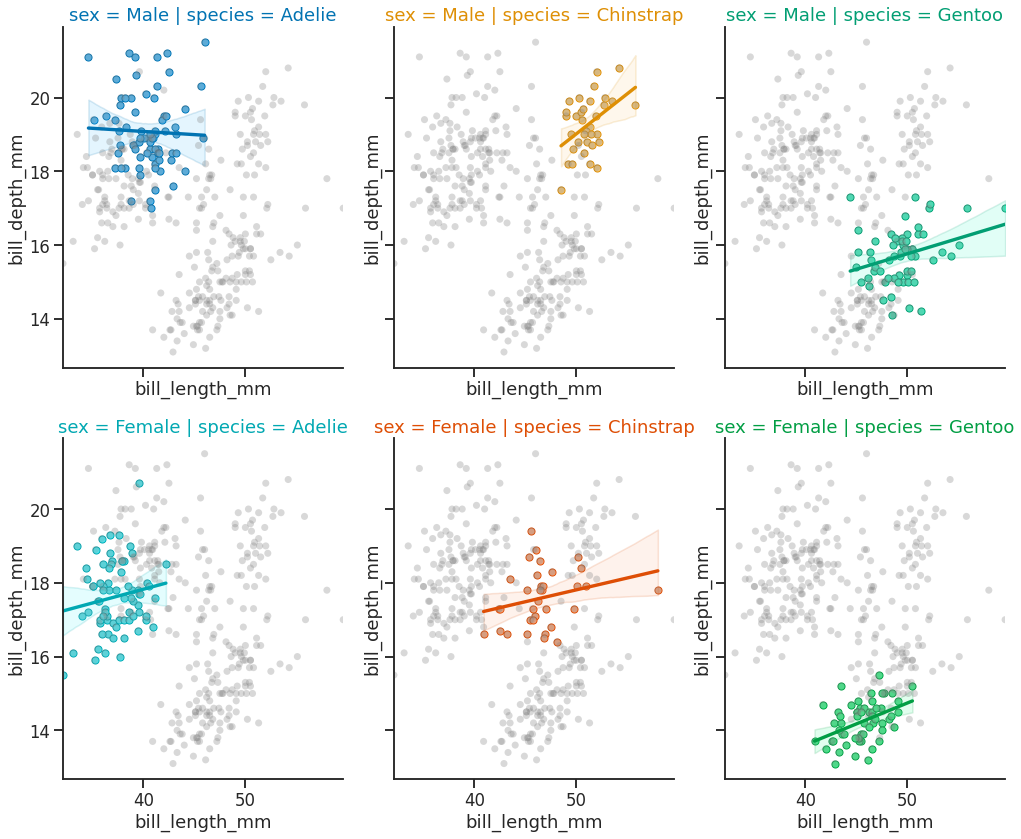

In [33]:
g = sns.lmplot(x="bill_length_mm", y="bill_depth_mm",       # sns.lmplot 생성 FacetGrid 출력
               data=df_peng, 
               height=6, aspect=0.8,
               col="species", row="sex",                    # species와 sex로 데이터 분할
               scatter_kws={"s":50})

axes = g.axes               # FacetGrid에서 Axes 추출
for i, ax in enumerate(axes.ravel()):     # Axes 순회, 전체 데이터를 배경으로 표현
    scatter, reg, cb = ax.get_children()[:3]
    if i > 2:
        i -= 3
        dh = -0.05
    else:
        dh = 0
    scatter.set(fc=modify_hls(f"C{i}", dl=0.3, dh=dh), ec=modify_hls(f"C{i}", dh=dh), alpha=1)
    reg.set_color(modify_hls(f"C{i}", dh=dh))
    cb.set(fc=modify_hls(f"C{i}", dl=0.3, dh=dh), ec=modify_hls(f"C{i}", dh=dh))
    sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=df_peng, 
                fit_reg=False, 
                scatter_kws={"fc":"gray", "ec":"none", "s":50, "alpha":0.3}, ax=ax)
    title = ax.get_title()
    ax.set_title(title, color=modify_hls(f"C{i}", dh=dh))
    
fig = g.fig
fig.tight_layout()
fig.savefig("103_snsreglmplot_00.png")    